# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 4</span>
### Exercise 04.1


The first exercise consists in adding two features to the existing code:
- the possibility to restart the simulation from a previous one using the last two configurations save
- the possibility to rescale the velocities to match a desired temperature

The plots below show the instantaneous values of the temperature and potential, kinetic and total energy during the equilibration phase: the equilibrium was fully reached in all three cases (gas, liquid and solid) by the eight run of $10^5$ total steps. LJ units are used in the plots.

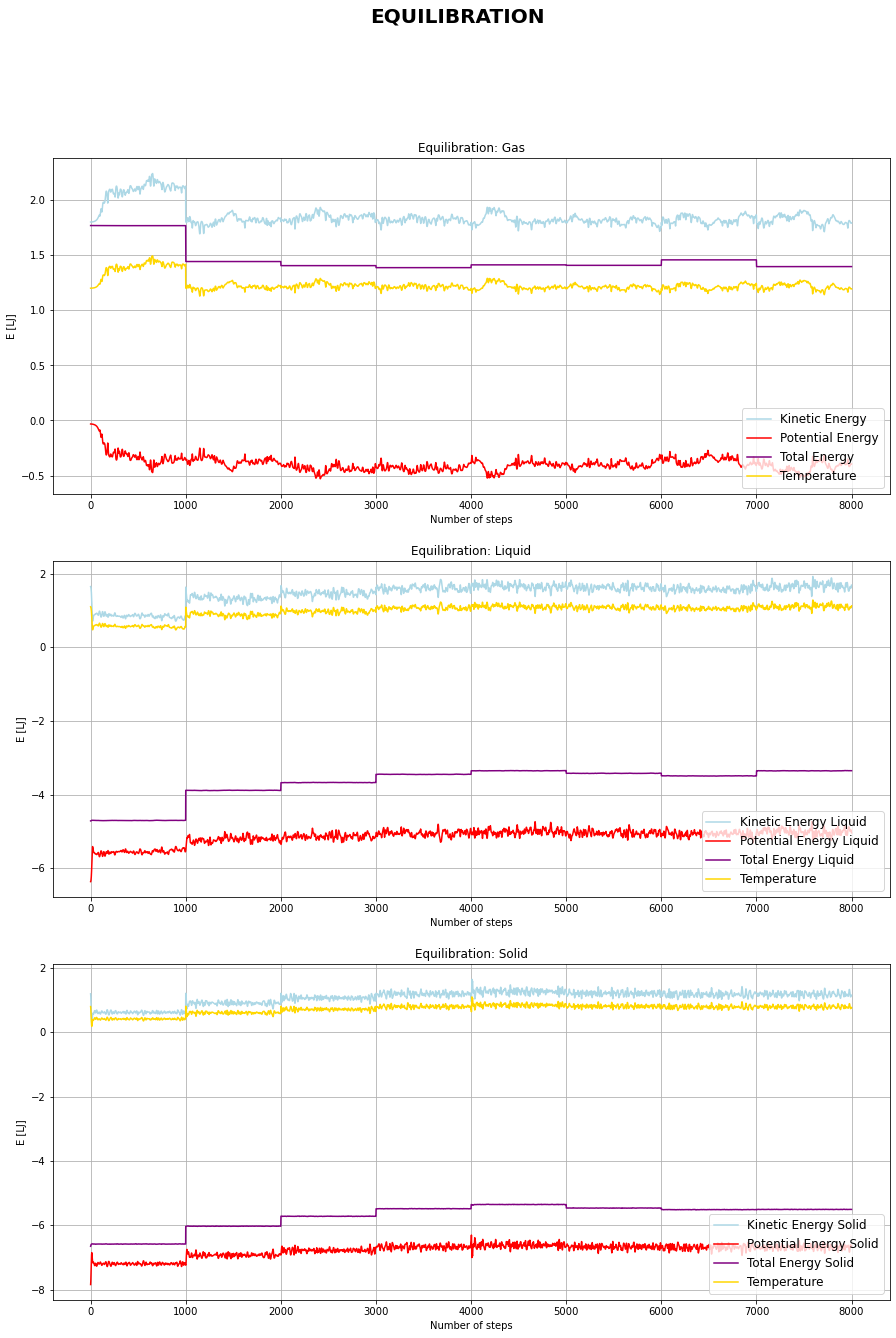

In [66]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math


y_kin=np.loadtxt("output_ekin_gas.dat", max_rows = 8000, unpack=True)
y_pot=np.loadtxt("output_epot_gas.dat", max_rows = 8000, unpack=True)
y_tot=np.loadtxt("output_etot_gas.dat", max_rows = 8000, unpack=True)
y_temp=np.loadtxt("output_temp_gas.dat", max_rows = 8000, unpack=True)

x = np.arange(y_tot.size)

fig=plt.figure(figsize=(15,21))
fig.suptitle('EQUILIBRATION', fontweight = 'bold', fontsize = 20)
plt.subplot(311)
plt.plot(x, y_kin, label="Kinetic Energy", color = "lightblue")
plt.plot(x, y_pot, label="Potential Energy", color = "red")
plt.plot(x, y_tot, label="Total Energy", color = "purple")
plt.plot(x, y_temp, label="Temperature", color = "gold")
plt.xlabel('Number of steps')
plt.ylabel('E [LJ]')
plt.title("Equilibration: Gas")
plt.grid(True)
plt.legend(loc="lower right", prop={'size': 12})

plt.subplot(312)

y_kin=np.loadtxt("output_ekin_liquid.dat", max_rows = 8000, unpack=True)
y_pot=np.loadtxt("output_epot_liquid.dat", max_rows = 8000, unpack=True)
y_tot=np.loadtxt("output_etot_liquid.dat", max_rows = 8000, unpack=True)
y_temp=np.loadtxt("output_temp_liquid.dat", max_rows = 8000, unpack=True)

x = np.arange(y_tot.size)

plt.plot(x, y_kin, label="Kinetic Energy Liquid", color = "lightblue")
plt.plot(x, y_pot, label="Potential Energy Liquid", color = "red")
plt.plot(x, y_tot, label="Total Energy Liquid", color = "purple")
plt.plot(x, y_temp, label="Temperature", color = "gold")
plt.xlabel('Number of steps')
plt.ylabel('E [LJ]')
plt.title("Equilibration: Liquid")
plt.grid(True)
plt.legend(loc="lower right", prop={'size': 12})

plt.subplot(313)

y_kin=np.loadtxt("output_ekin_solid.dat", max_rows = 8000, unpack=True)
y_pot=np.loadtxt("output_epot_solid.dat", max_rows = 8000, unpack=True)
y_tot=np.loadtxt("output_etot_solid.dat", max_rows = 8000, unpack=True)
y_temp=np.loadtxt("output_temp_solid.dat", max_rows = 8000, unpack=True)

x = np.arange(y_tot.size)

plt.plot(x, y_kin, label="Kinetic Energy Solid", color = "lightblue")
plt.plot(x, y_pot, label="Potential Energy Solid", color = "red")
plt.plot(x, y_tot, label="Total Energy Solid", color = "purple")
plt.plot(x, y_temp, label="Temperature", color = "gold")
plt.xlabel('Number of steps')
plt.ylabel('E [LJ]')
plt.title("Equilibration: Solid")
plt.grid(True)
plt.legend(loc="lower right", prop={'size': 12})

plt.show()

### Exercise 04.2 & 3

Following are the results obtained for the simulation phase of the gas, liquid and solid Argon, in the following conditions:

1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

The values of the total energy per particle, $E/N$, the potential energy per particle, $U/N$, the kinetic energy per particle, $K/N$ and the temperature, $T$ are shown below.
All results are in SI units and the uncertainties are calculated using the blocking average method. In the simulation phase one run of $10^6$ steps divided into 100 blocks is performed.

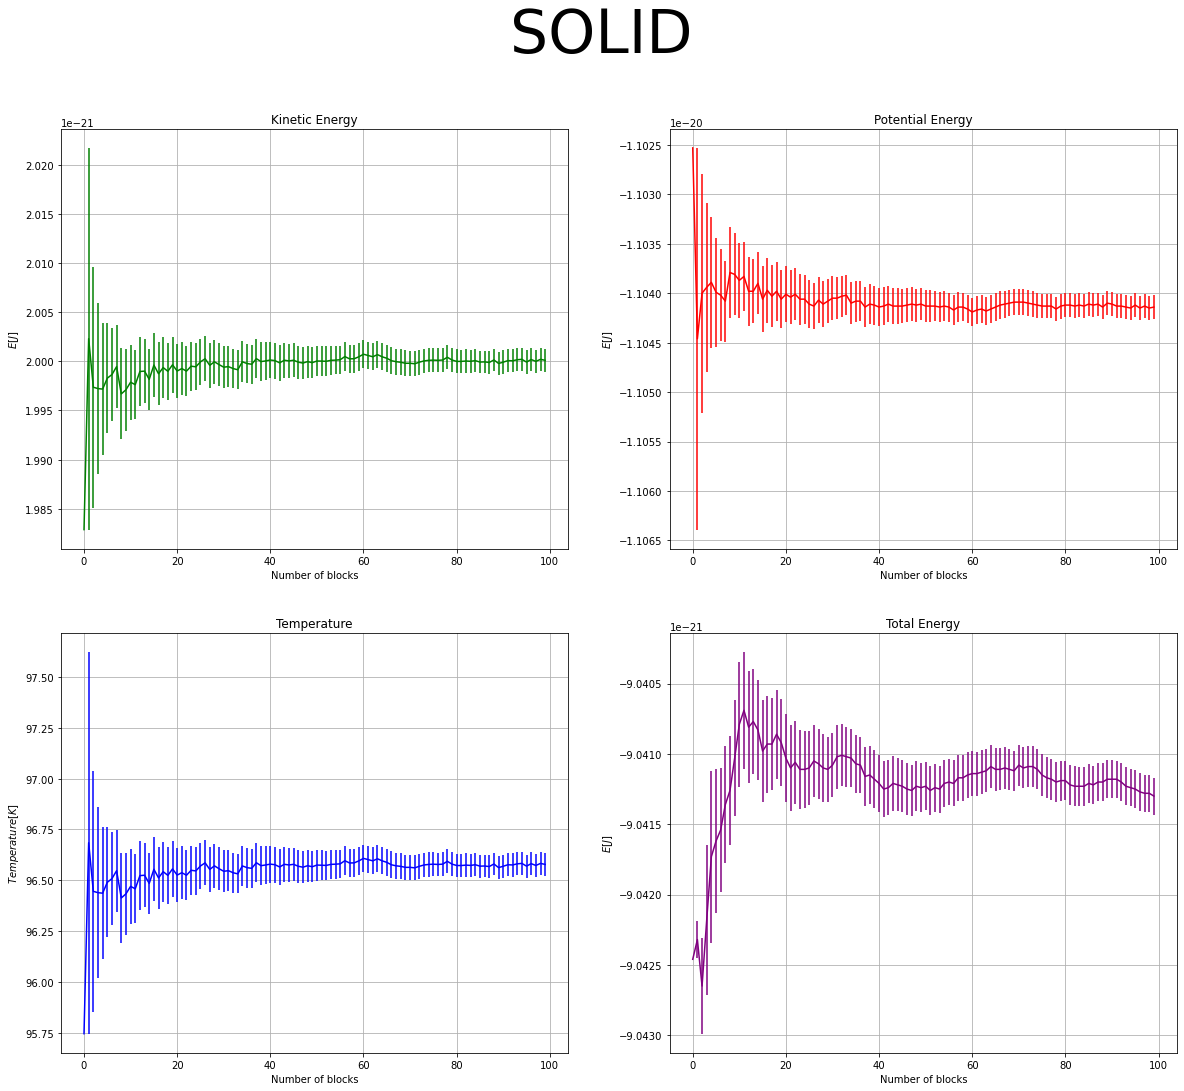

In [59]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math


y_kin,err_kin=np.loadtxt("ave_ekin_solid.dat", usecols=(1, 2), skiprows = 800,  unpack=True)
x_kin = np.arange(y_kin.size)

fig=plt.figure(figsize=(20, 17))

fig.suptitle("SOLID", fontsize = 60)

plt.subplot(221)

plt.errorbar(x_kin, y_kin, yerr=err_kin, color = "green")
plt.xlabel('Number of blocks')
plt.ylabel('$E [J]$')
plt.title("Kinetic Energy")
plt.grid(True)

plt.subplot(222)

x_pot,y_pot,err_pot=np.loadtxt("ave_epot_solid.dat", usecols=(0, 1, 2), skiprows = 800, unpack=True)
x_pot = np.arange(y_pot.size)
plt.errorbar(x_pot, y_pot, yerr=err_pot, color = "red")
plt.xlabel('Number of blocks')
plt.ylabel('$E [J]$')
plt.title("Potential Energy")
plt.grid(True)

plt.subplot(223)

y_tot,err_tot=np.loadtxt("ave_temp_solid.dat", usecols=(1, 2), skiprows = 800, unpack=True)
x_tot = np.arange(y_tot.size)
plt.errorbar(x_tot, y_tot, yerr=err_tot, color = "blue")
plt.xlabel('Number of blocks')
plt.ylabel('$Temperature [K]$')
plt.title("Temperature")
plt.grid(True)

plt.subplot(224)

y_tot,err_tot=np.loadtxt("ave_etot_solid.dat", usecols=(1, 2), skiprows = 800, unpack=True)
x_tot = np.arange(y_tot.size)
plt.errorbar(x_tot, y_tot, yerr=err_tot, color = "purple")
plt.xlabel('Number of blocks')
plt.ylabel('$E [J]$')
plt.title("Total Energy")
plt.grid(True)



plt.show()

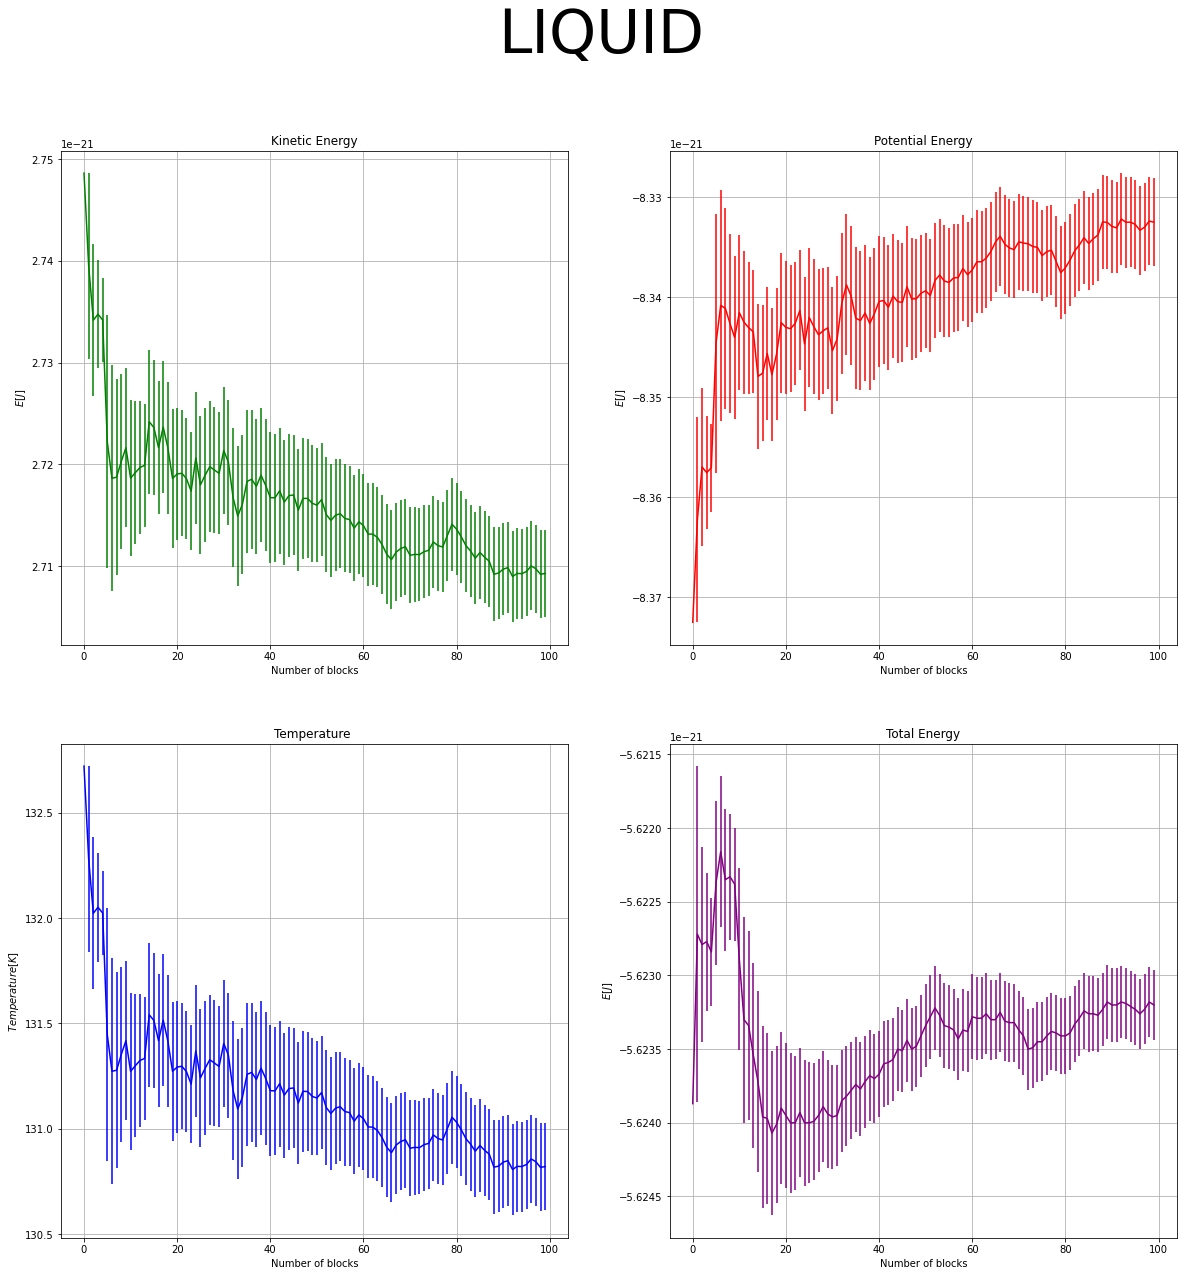

In [60]:

y_kin,err_kin=np.loadtxt("ave_ekin_liquid.dat", usecols=(1, 2), skiprows = 800,  unpack=True)
x_kin = np.arange(y_kin.size)

fig=plt.figure(figsize=(20, 20))
fig.suptitle("LIQUID", fontsize = 60)

plt.subplot(221)

plt.errorbar(x_kin, y_kin, yerr=err_kin, color = "green")
plt.xlabel('Number of blocks')
plt.ylabel('$E [J]$')
plt.title("Kinetic Energy")
plt.grid(True)

plt.subplot(222)

x_pot,y_pot,err_pot=np.loadtxt("ave_epot_liquid.dat", usecols=(0, 1, 2), skiprows = 800, unpack=True)
x_pot = np.arange(y_pot.size)
plt.errorbar(x_pot, y_pot, yerr=err_pot, color = "red")
plt.xlabel('Number of blocks')
plt.ylabel('$E [J]$')
plt.title("Potential Energy")
plt.grid(True)

plt.subplot(223)

y_tot,err_tot=np.loadtxt("ave_temp_liquid.dat", usecols=(1, 2), skiprows = 800, unpack=True)
x_tot = np.arange(y_tot.size)
plt.errorbar(x_tot, y_tot, yerr=err_tot, color = "blue")
plt.xlabel('Number of blocks')
plt.ylabel('$Temperature [K]$')
plt.title("Temperature ")
plt.grid(True)

plt.subplot(224)

y_tot,err_tot=np.loadtxt("ave_etot_liquid.dat", usecols=(1, 2), skiprows = 800, unpack=True)
x_tot = np.arange(y_tot.size)
plt.errorbar(x_tot, y_tot, yerr=err_tot, color = "purple")
plt.xlabel('Number of blocks')
plt.ylabel('$E [J]$')
plt.title("Total Energy")
plt.grid(True)



plt.show()

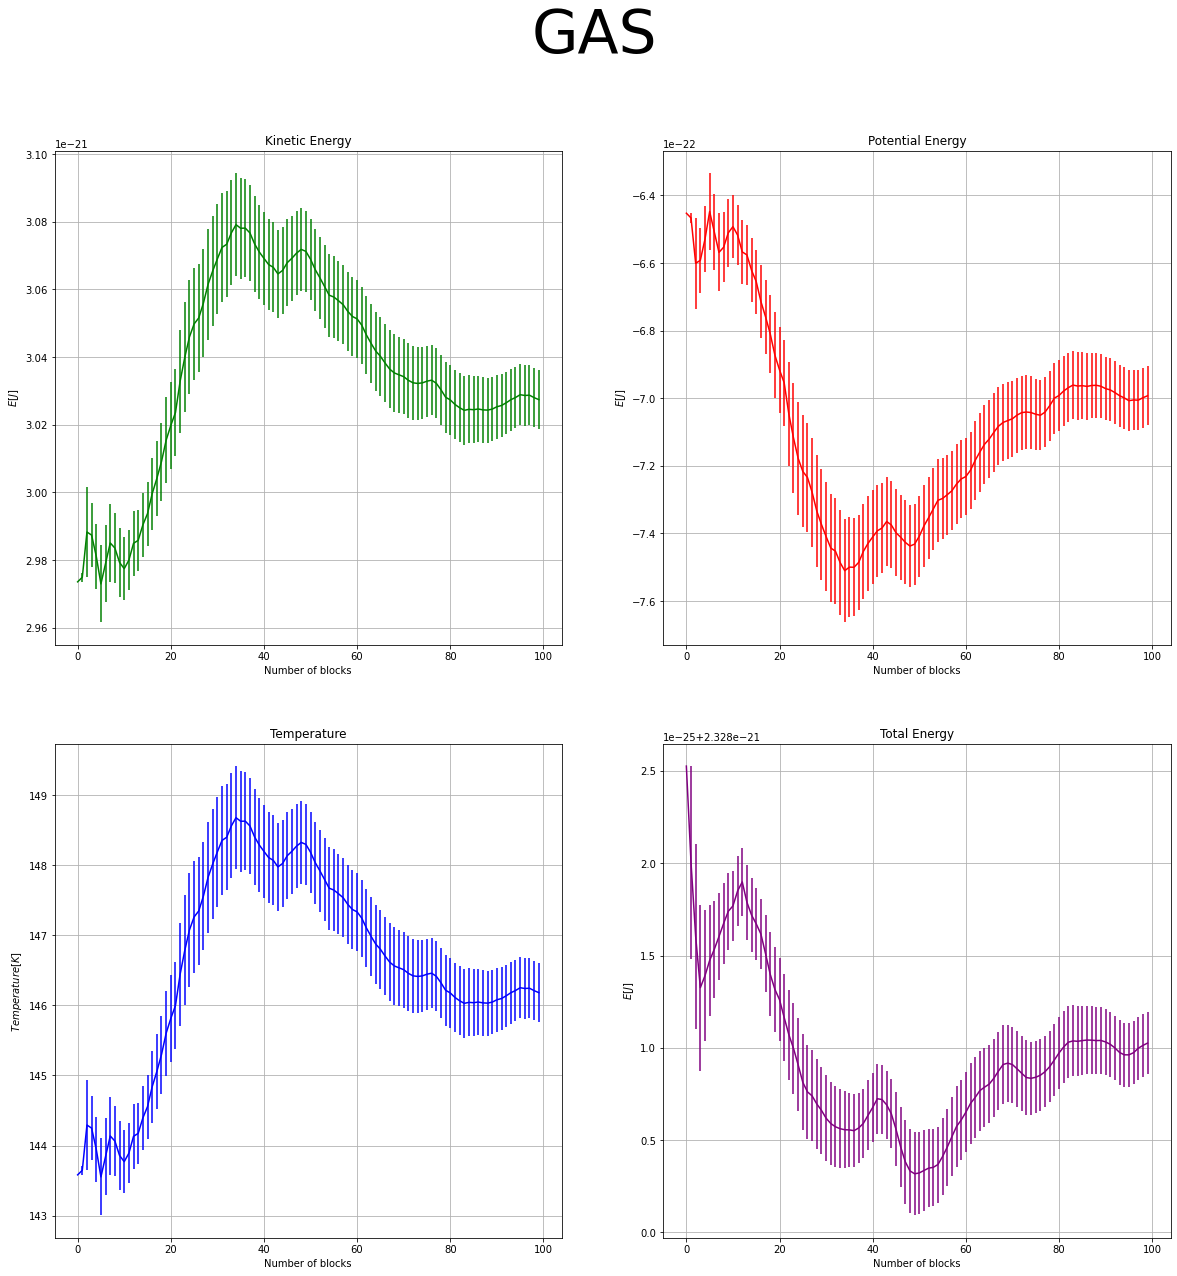

In [64]:

y_kin,err_kin=np.loadtxt("ave_ekin_gas.dat", usecols=(1, 2), skiprows = 800,  unpack=True)
x_kin = np.arange(y_kin.size)

fig=plt.figure(figsize=(20, 20))
fig.suptitle("GAS", fontsize = 60)

plt.subplot(221)

plt.errorbar(x_kin, y_kin, yerr=err_kin, color = "green")
plt.xlabel('Number of blocks')
plt.ylabel('$E [J]$')
plt.title("Kinetic Energy")
plt.grid(True)

plt.subplot(222)

x_pot,y_pot,err_pot=np.loadtxt("ave_epot_gas.dat", usecols=(0, 1, 2), skiprows = 800, unpack=True)
x_pot = np.arange(y_pot.size)
plt.errorbar(x_pot, y_pot, yerr=err_pot, color = "red")
plt.xlabel('Number of blocks')
plt.ylabel('$E [J]$')
plt.title("Potential Energy")
plt.grid(True)

plt.subplot(223)

y_tot,err_tot=np.loadtxt("ave_temp_gas.dat", usecols=(1, 2), skiprows = 800, unpack=True)
x_tot = np.arange(y_tot.size)
plt.errorbar(x_tot, y_tot, yerr=err_tot, color = "blue")
plt.xlabel('Number of blocks')
plt.ylabel('$Temperature [K]$')
plt.title("Temperature")
plt.grid(True)

plt.subplot(224)

y_tot,err_tot=np.loadtxt("ave_etot_gas.dat", usecols=(1, 2), skiprows = 800, unpack=True)
x_tot = np.arange(y_tot.size)
plt.errorbar(x_tot, y_tot, yerr=err_tot, color = "purple")
plt.xlabel('Number of blocks')
plt.ylabel('$E [J]$')
plt.title("Total Energy")
plt.grid(True)


plt.show()